# Plot AFAPE Results
Plot the results for different agents 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

In [2]:
# which dataset to work on 
dataset_name   = "synthetic_1"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# name for agents
agent_names  = ['DQN'] #, 'Random 10%']
n_agents = len(agent_names) 

# included estimators
included_estimator_types =  ['blocking', 'ground_truth']

In [3]:
# other specifications 
data_dir       = "../../../data/ts/" + dataset_name + "/" + miss_scenario + "/" 
agent_dirs     = [data_dir + 'afa_agents' + '/' + agent_name + '/' for agent_name in agent_names]

# find all bootstrap results files
agent_bootstrap_files_list = []
for agent_i in range(n_agents):
    agent_bootstrap_files = {}
    for included_estimator_type in included_estimator_types:
        agent_bootstrap_files[included_estimator_type] = agent_dirs[agent_i] + included_estimator_type + '_' + 'J_bootstraps.hkl'
    agent_bootstrap_files_list.append(agent_bootstrap_files)

## Load results

In [4]:
from afa.afa_models.afa_estimators.utils import load_results_bootstrapping

In [5]:
J_bootstraps_list = []
for agent_i in range(n_agents):
    
    J_bootstraps = {}
    for included_estimator_type in included_estimator_types:
        # load bootstrap results for estimator_type
        bootstrap_file = agent_bootstrap_files_list[agent_i][included_estimator_type]
        
        J_bootstraps_added = load_results_bootstrapping( bootstrap_file )
        
        # merge
        J_bootstraps = {**J_bootstraps, **J_bootstraps_added}
        
    J_bootstraps_list.append(J_bootstraps)

## Plot results

In [6]:
from afa.afa_models.afa_estimators.visualization.plot_estimation_results import plot_estimation_results

(<Figure size 288x432 with 1 Axes>, None)

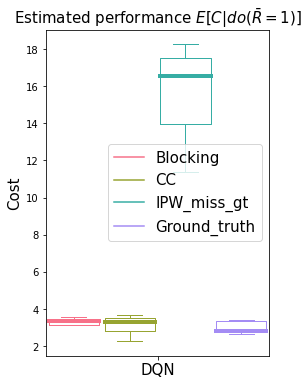

In [7]:
plot_estimation_results( J_bootstraps_list, agent_names,  title = None)